In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


## Computing the probability density

In [37]:
def compute_p(X, mean, sigma):
    """
    Compute the probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        p: (n, ) numpy array, the probability of each data point

    >>> compute_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([0.15915494, 0.05854983])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    constant_term = 1/((2*np.pi)**(X.shape[1]/2)*np.linalg.det(sigma)**0.5)
    exp_term = np.diagonal(np.exp(-0.5*(X.T - mean).T @ np.linalg.inv(sigma) @ (X.T - mean)))
    return constant_term * exp_term


test(compute_p)

✅ Your `compute_p` passed 1 tests.


In [33]:
X = np.array([[0, 0], [1, 1]])
sigma = np.eye(2)
mean = np.array([0, 0])
# ((x-mu) * (np.linalg.inv(cov_mat)@(x-mu).T).T).sum(-1))
p = np.exp(-0.5*((X - mean)*(np.linalg.inv(sigma)@(X-mean).T).T).sum(-1))
p

array([1.        , 0.36787944])

In [42]:
means

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]

In [13]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [ ]:
ps = compute_p(X, m, s)

In [14]:
assignments = np.argmax(ps, axis=0)
print(assignments)

[1 0]


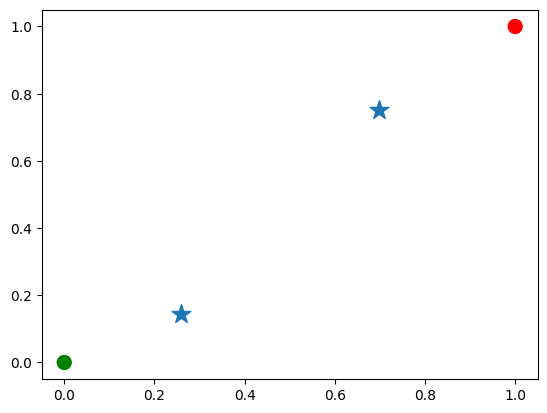

In [15]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

Solution
===

In [17]:
def compute_log_p(X, mean, sigma):
    """
    Compute the log probability of each data point in X under a Gaussian distribution

    Args:
        X: (n, d) numpy array, where each row corresponds to a data point
        mean: (d, ) numpy array, the mean of the Gaussian distribution
        sigma: (d, d) numpy array, the covariance matrix of the Gaussian distribution

    Returns:
        log_p: (n, ) numpy array, the log probability of each data point

    >>> compute_log_p(np.array([[0, 0], [1, 1]]), np.array([0, 0]), np.eye(2))
    array([-1.83787707, -2.83787707])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ***************************************************
    return np.log(compute_p(X, mean, sigma))


test(compute_log_p)

✅ Your `compute_log_p` passed 1 tests.


In [18]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [54]:
stacked_means = np.hstack((means[0], means[1]))
stacked_sigma = np.zeros((4, 4))
stacked_sigma[0:2, 0:2] = sigmas[0]
stacked_sigma[2:4, 2:4] = sigmas[1]
repeated_X = np.hstack((X, X))
repeated_X

array([[0, 0, 0, 0],
       [1, 1, 1, 1]])

In [55]:
compute_log_p(repeated_X, stacked_means, stacked_sigma)

ValueError: operands could not be broadcast together with shapes (4,2) (4,) 

In [19]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 0]


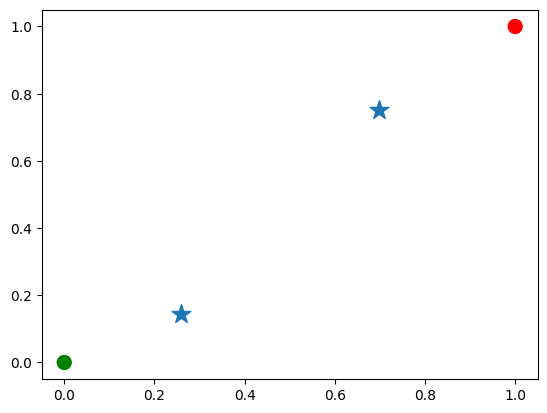

In [20]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()